In [75]:
import numpy as np
hout = np.load("Hout_VGG16_train.npy", allow_pickle=True)
hout = [np.array(h, dtype=np.float32) for h in hout]
hhout = np.concatenate(hout, axis=0)

In [76]:
# GMM拟合
from sklearn.mixture import GaussianMixture
X = hhout[:,[110]]
clf = GaussianMixture(n_components=30, covariance_type='diag', random_state=1)
clf.fit(X)

GaussianMixture(covariance_type='diag', n_components=50, random_state=1)

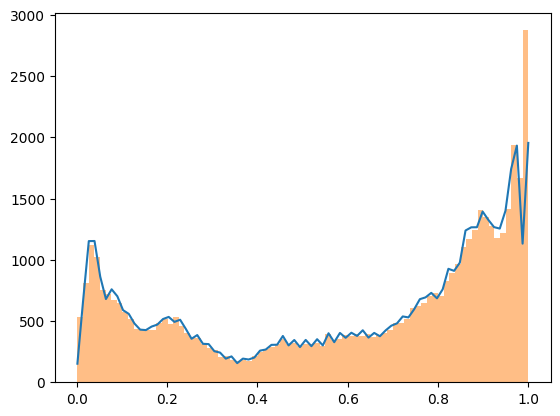

In [77]:
from matplotlib import pyplot as plt
count = 80
bins = np.histogram_bin_edges(X, bins=count)
x = np.linspace(bins[0], bins[-1], count)
p = np.exp(clf.score_samples(x.reshape(-1, 1)))
p = p / p.sum() * X.shape[0]
plt.plot(x, p)
plt.hist(X, bins=count, alpha=0.5, label='a')
plt.show()

In [78]:
# GMM拟合效果

from scipy.stats import chi2
def chi2_test(clf, X):
    bins = np.histogram_bin_edges(X, bins='auto')
    hist, bin_edges = np.histogram(X, bins=bins)
    i = 0 
    while i < len(hist)-1:
        if hist[i] < 6:
            hist[i] = hist[i] + hist[i+1]
            hist = np.delete(hist, i+1)
            bin_edges = np.delete(bin_edges, i+1)
        else :
            i += 1

    p = np.exp(clf.score_samples(bin_edges.reshape(-1, 1)))
    p = (p[:-1] + p[1:]) / 2
    p = p / p.sum() * hist.sum()

    Z = np.sum((hist - p)**2 / hist)
    p = 1 - chi2.cdf(Z, len(hist) - 1)
    return p

def R2_test(clf, X):
    bins = np.histogram_bin_edges(X, bins='auto')
    hist, bin_edges = np.histogram(X, bins=bins)

    p = np.exp(clf.score_samples(bin_edges.reshape(-1, 1)))
    p = (p[:-1] + p[1:]) / 2
    p = p / p.sum() * hist.sum()

    R = 1 - np.sum((hist - p)**2) / np.sum((hist - hist.mean())**2)
    return R

from tqdm import tqdm
def testgmm(y ,n=10):
    sum = 0
    for i in tqdm(range(y.shape[1])):
        X = y[:, [i]]
        clf = GaussianMixture(n_components=n, covariance_type='diag', random_state=1)
        clf.fit(X)
        sum += R2_test(clf, X)
    return sum / y.shape[1]

testgmm(hout[0], 3), \
testgmm(hhout, 10)

100%|██████████| 512/512 [16:07<00:00,  1.89s/it]


0.8085798300518716